# Introduction to NumPy

This part of the book, along with [Part 3](03.00-Introduction-to-Pandas.ipynb), outlines techniques for effectively loading, storing, and manipulating in-memory data in Python.
The topic is very broad: datasets can come from a wide range of sources and in a wide range of formats, including collections of documents, collections of images, collections of sound clips, collections of numerical measurements, or nearly anything else.
Despite this apparent heterogeneity, many datasets can be represented fundamentally as arrays of numbers.

For example, images—particularly digital images—can be thought of as simply two-dimensional arrays of numbers representing pixel brightness across the area.
Sound clips can be thought of as one-dimensional arrays of intensity versus time.
Text can be converted in various ways into numerical representations, such as binary digits representing the frequency of certain words or pairs of words.
No matter what the data is, the first step in making it analyzable will be to transform it into arrays of numbers.
(We will discuss some specific examples of this process in [Feature Engineering](05.04-Feature-Engineering.ipynb).)

For this reason, efficient storage and manipulation of numerical arrays is absolutely fundamental to the process of doing data science.
We'll now take a look at the specialized tools that Python has for handling such numerical arrays: the NumPy package and the Pandas package (discussed in [Part 3](03.00-Introduction-to-Pandas.ipynb)).

This part of the book will cover NumPy in detail. NumPy (short for *Numerical Python*) provides an efficient interface to store and operate on dense data buffers.
In some ways, NumPy arrays are like Python's built-in `list` type, but NumPy arrays provide much more efficient storage and data operations as the arrays grow larger in size.
NumPy arrays form the core of nearly the entire ecosystem of data science tools in Python, so time spent learning to use NumPy effectively will be valuable no matter what aspect of data science interests you.

If you followed the advice outlined in the Preface and installed the Anaconda stack, you already have NumPy installed and ready to go.
If you're more the do-it-yourself type, you can go to http://www.numpy.org/ and follow the installation instructions found there.
Once you do, you can import NumPy and double-check the version:

In [ ]:
import numpy
numpy.__version__

'1.21.2'

For the pieces of the package discussed here, I'd recommend NumPy version 1.8 or later.
By convention, you'll find that most people in the SciPy/PyData world will import NumPy using `np` as an alias:

In [ ]:
import numpy as np

Throughout this chapter, and indeed the rest of the book, you'll find that this is the way we will import and use NumPy.

## Reminder About Built-in Documentation

As you read through this part of the book, don't forget that IPython gives you the ability to quickly explore the contents of a package (by using the tab completion feature), as well as the documentation of various functions (using the `?` character). For a refresher on these, refer back to [Help and Documentation in IPython](01.01-Help-And-Documentation.ipynb).

For example, to display all the contents of the NumPy namespace, you can type this:

```ipython
In [3]: np.<TAB>
```

And to display NumPy's built-in documentation, you can use this:

```ipython
In [4]: np?
```

More detailed documentation, along with tutorials and other resources, can be found at http://www.numpy.org.

TypeError: cannot unpack non-iterable Bbox object

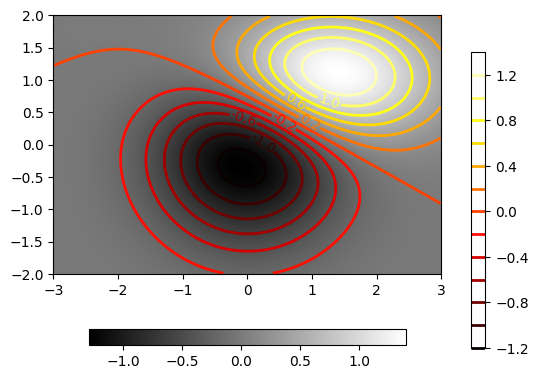

In [9]:

 # make a colorbar for the contour linesimport numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as stats

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)

# Use scipy.stats.multivariate_normal instead of bivariate_normal
# Define mean and covariance for each distribution
mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]]
mean2 = [1, 1]
cov2 = [[1.5, 0], [0, 0.5]]

# Generate the bivariate normal distributions
Z1 = stats.multivariate_normal.pdf(np.dstack((X, Y)), mean=mean1, cov=cov1)
Z2 = stats.multivariate_normal.pdf(np.dstack((X, Y)), mean=mean2, cov=cov2)
Z = 10.0 * (Z2 - Z1)  # difference of Gaussians

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111)

# Make a grayscale image
im = ax.imshow(Z, interpolation='bilinear', cmap=cm.gray, extent=(-3, 3, -2, 2), origin='lower')

# Do a contour using a "hot" colormap for the lines
levels = np.arange(-1.2, 1.6, 0.2)
cs = ax.contour(Z, levels, linewidths=2, cmap=cm.hot, extent=(-3, 3, -2, 2), origin='lower')

# Label every 2nd contour inline
ax.clabel(cs, levels[1::2], inline=1, fmt='%1.1f')
cbar = fig.colorbar(cs, shrink=0.8, extend='both')
 # we can still add a colorbar for the image, too.
cbarim = fig.colorbar(im, orientation= 'horizontal', shrink=0.8)
 # This makes the original colorbar look a bit
# out of place, so let’s improve its position.
l,b,w,h = ax.get_position()
ll,bb,ww,hh = cbar.ax.get_position()
cbar.ax.set_position([ll, b+0.1*h, ww, h*0.8])
show()
plt.show() # Display the plot


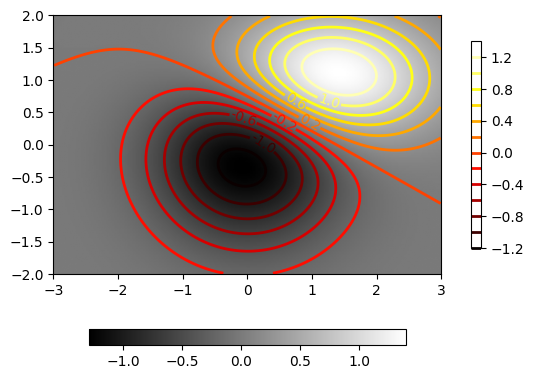

In [10]:
# make a colorbar for the contour linesimport numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as stats

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)

# Use scipy.stats.multivariate_normal instead of bivariate_normal
# Define mean and covariance for each distribution
mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]]
mean2 = [1, 1]
cov2 = [[1.5, 0], [0, 0.5]]

# Generate the bivariate normal distributions
Z1 = stats.multivariate_normal.pdf(np.dstack((X, Y)), mean=mean1, cov=cov1)
Z2 = stats.multivariate_normal.pdf(np.dstack((X, Y)), mean=mean2, cov=cov2)
Z = 10.0 * (Z2 - Z1)  # difference of Gaussians

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111)

# Make a grayscale image
im = ax.imshow(Z, interpolation='bilinear', cmap=cm.gray, extent=(-3, 3, -2, 2), origin='lower')

# Do a contour using a "hot" colormap for the lines
levels = np.arange(-1.2, 1.6, 0.2)
cs = ax.contour(Z, levels, linewidths=2, cmap=cm.hot, extent=(-3, 3, -2, 2), origin='lower')

# Label every 2nd contour inline
ax.clabel(cs, levels[1::2], inline=1, fmt='%1.1f')
cbar = fig.colorbar(cs, shrink=0.8, extend='both')
 # we can still add a colorbar for the image, too.
cbarim = fig.colorbar(im, orientation= 'horizontal', shrink=0.8)
 # This makes the original colorbar look a bit
# out of place, so let’s improve its position.
bbox = ax.get_position() # Get the Bbox object
l, b, w, h = bbox.x0, bbox.y0, bbox.width, bbox.height # Extract values from Bbox

ll,bb,ww,hh = cbar.ax.get_position().bounds # Extract bounds from the colorbar's Bbox
cbar.ax.set_position([ll, b+0.1*h, ww, h*0.8]) #Use extracted values to adjust the position
plt.show() # Display the plot

In [15]:
import numpy as np
import pandas as pd

np.random.seed(42 )
n_samples = 1000
data = {
    "price": np.random.normal(200000,50000,n_samples).astype(int),
    'size' : np.random.normal(1500,500,n_samples).astype(int),
    'num_rooms' : np.random.randint(2,8,n_samples),
    'num_bathrooms' : np.random.randint(1,4,n_samples),
    'age' : np.random.randint(0,40,n_samples),
    'neighborhood' : np.random.choice(['A','B','C','D','E'],n_samples),
    'income' : np.random.normal(40000,10000,n_samples).astype(int)
}
df = pd.DataFrame(data)
df

,price,size,num_rooms,num_bathrooms,age,neighborhood,income
0,224835,2199,7,2,15,E,52202
1,193086,1962,7,3,27,D,29233
2,232384,1529,4,1,15,A,32374
3,276151,1176,4,3,3,E,50363
4,188292,1849,4,3,25,A,34044
...,...,...,...,...,...,...,...
995,185944,2035,2,1,2,B,37794
996,289884,1486,2,3,12,A,38062
997,232042,1059,6,3,33,E,45402
998,171441,1418,6,2,23,D,42232


    price  size  num_rooms  num_bathrooms  age neighborhood  income
0  224835  2199          7              2   15            E   52202
1  193086  1962          7              3   27            D   29233
2  232384  1529          4              1   15            A   32374
3  276151  1176          4              3    3            E   50363
4  188292  1849          4              3   25            A   34044
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          1000 non-null   int64 
 1   size           1000 non-null   int64 
 2   num_rooms      1000 non-null   int64 
 3   num_bathrooms  1000 non-null   int64 
 4   age            1000 non-null   int64 
 5   neighborhood   1000 non-null   object
 6   income         1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB
None
               price         size    num_roo

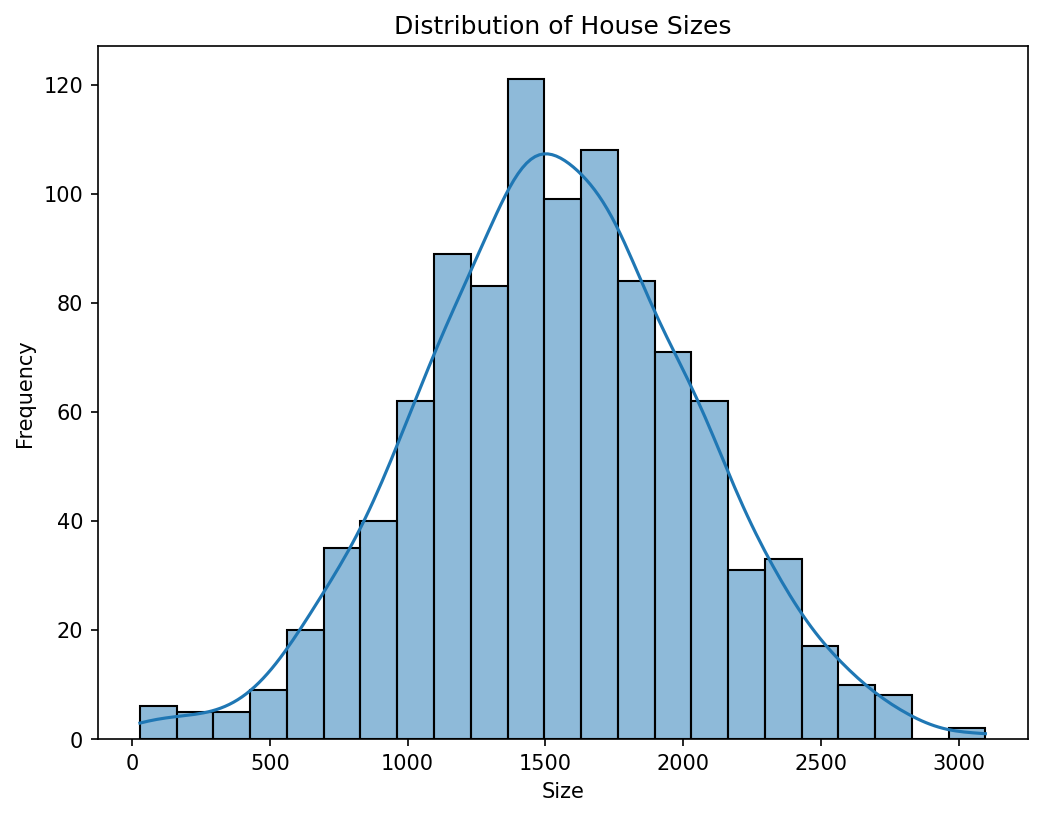

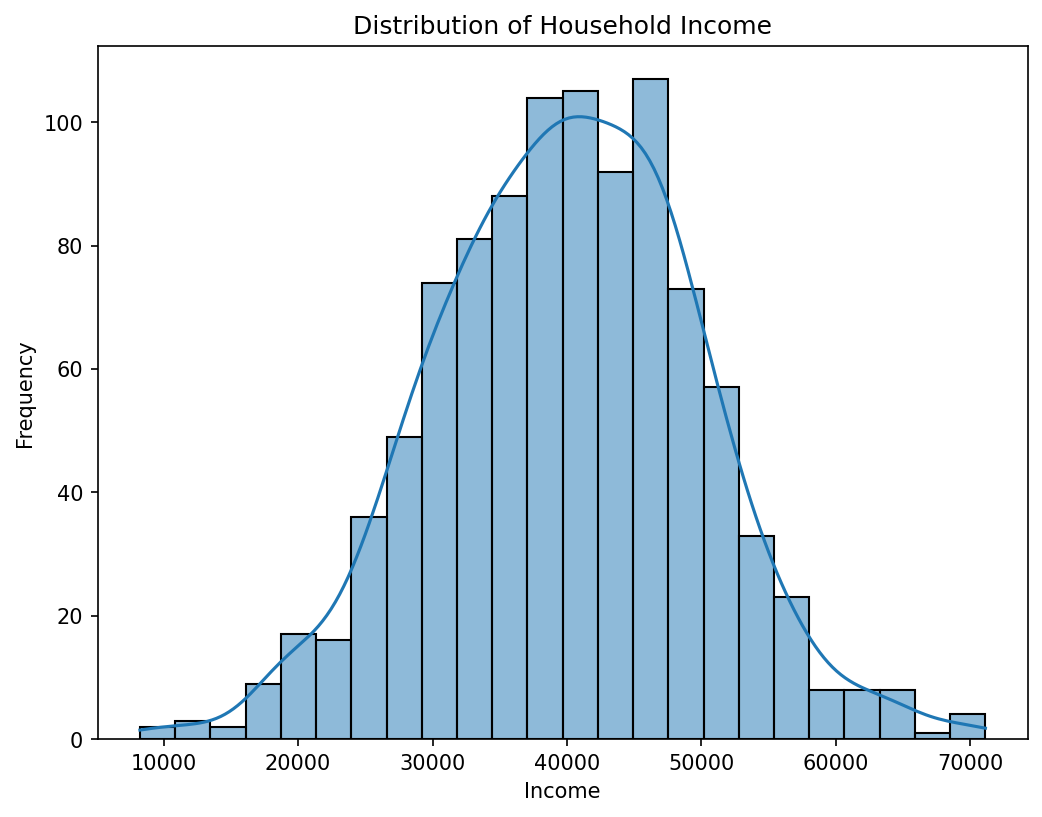

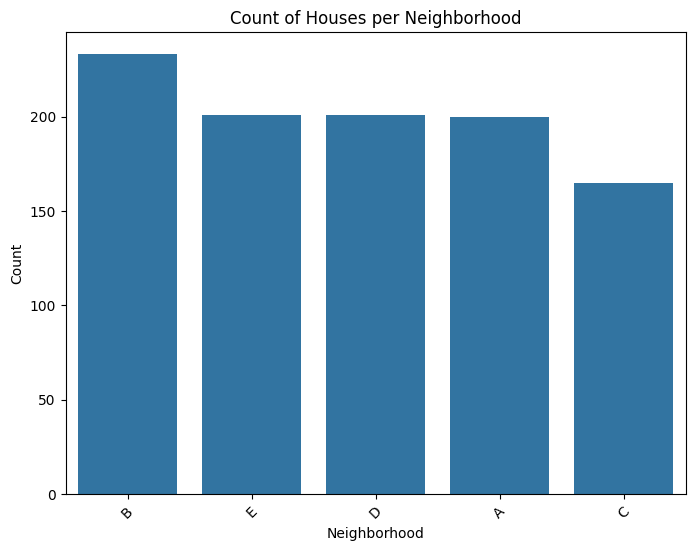

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic data exploration on the entire dataset
print(df.head())
print(df.info())
print(df.describe())

# Visualize distributions using distplot for 'size' and 'income'
plt.figure(figsize=(8, 6),dpi=150)
sns.histplot(df['size'], kde=True)
plt.title('Distribution of House Sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6),dpi=150)
sns.histplot(df['income'], kde=True)
plt.title('Distribution of Household Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Visualize count plot for categorical feature 'neighborhood'
plt.figure(figsize=(8, 6))
sns.countplot(x='neighborhood', data=df, order=df['neighborhood'].value_counts().index)
plt.title('Count of Houses per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Split data into features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Specify the actual column name you want to impute and scale
column_to_impute_scale = 'size'  # or any other numerical column in your DataFrame

# Handling missing values
imputer = SimpleImputer(strategy='median')
X_train[column_to_impute_scale] = imputer.fit_transform(X_train[[column_to_impute_scale]])
X_test[column_to_impute_scale] = imputer.transform(X_test[[column_to_impute_scale]])

# Scaling features
scaler = StandardScaler()
X_train[[column_to_impute_scale]] = scaler.fit_transform(X_train[[column_to_impute_scale]])
X_test[[column_to_impute_scale]] = scaler.transform(X_test[[column_to_impute_scale]])


In [20]:
from sklearn.preprocessing import PolynomialFeatures

# Creating polynomial and interaction features on training set
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_terms_train = poly.fit_transform(X_train[['size', 'num_rooms']])
interaction_terms_test = poly.transform(X_test[['size', 'num_rooms']])

interaction_df_train = pd.DataFrame(interaction_terms_train, columns=poly.get_feature_names_out(['size', 'num_rooms']))
interaction_df_test = pd.DataFrame(interaction_terms_test, columns=poly.get_feature_names_out(['size', 'num_rooms']))

# Merging the interaction terms with the original dataframes
X_train = pd.concat([X_train, interaction_df_train], axis=1)
X_test = pd.concat([X_test, interaction_df_test], axis=1)

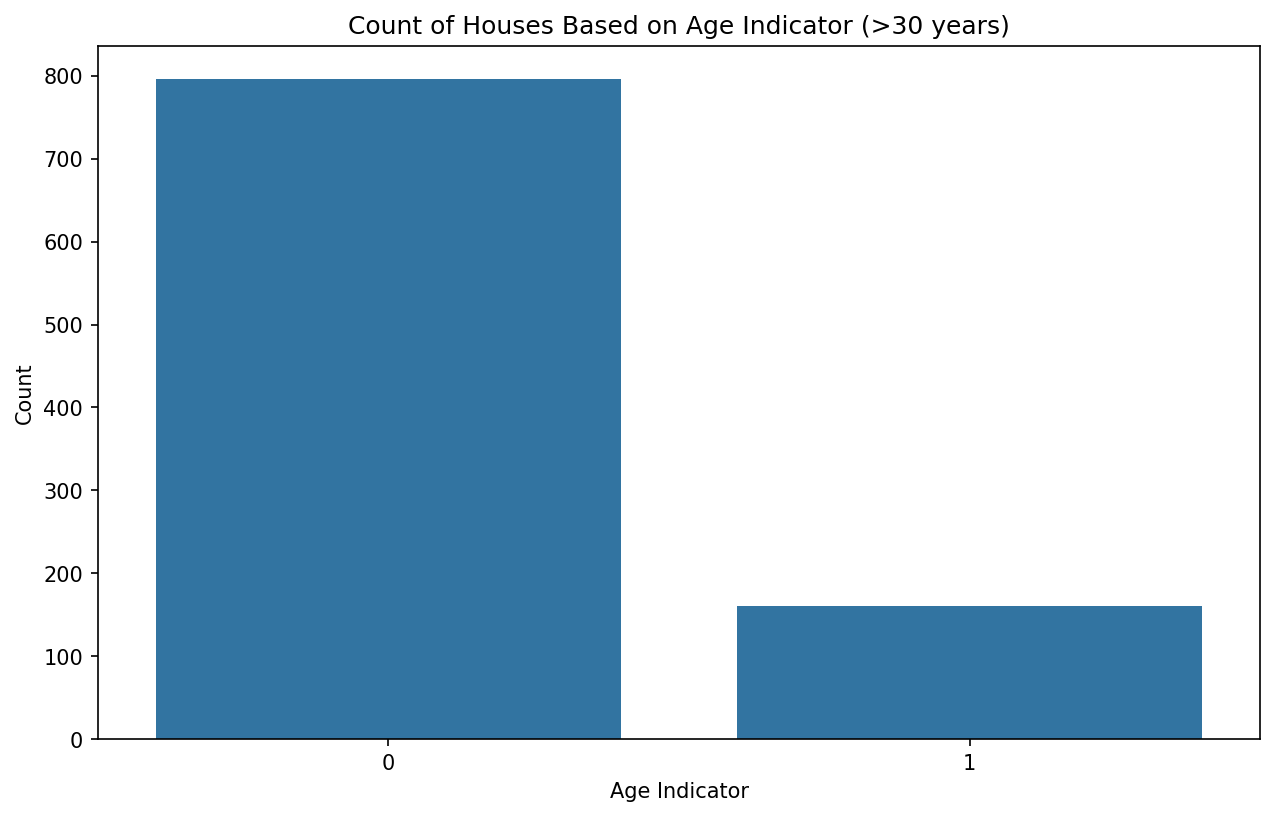

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Creating an indicator variable for houses older than 30 years
X_train['age_indicator'] = (X_train['age'] > 30).astype(int)
X_test['age_indicator'] = (X_test['age'] > 30).astype(int)

# Visualize the indicator variables
plt.figure(figsize=(10, 6),dpi=150)
sns.countplot(x='age_indicator', data=X_train)
plt.title('Count of Houses Based on Age Indicator (>30 years)')
plt.xlabel('Age Indicator')
plt.ylabel('Count')
plt.show()

In [22]:
X_train['age_bin'] = pd.cut(X_train['age'], bins=3, labels=['new', 'moderate', 'old'])
X_test['age_bin'] = pd.cut(X_test['age'], bins=3, labels=['new', 'moderate', 'old'])

# Income bins
X_train['income_bin'] = pd.cut(X_train['income'], bins=4, labels=['low', 'medium', 'high', 'very_high'])
X_test['income_bin'] = pd.cut(X_test['income'], bins=4, labels=['low', 'medium', 'high', 'very_high'])


In [23]:
def check_data_quality(df):
    # Store initial data quality metrics
    quality_report = {
        'missing_values': df.isnull().sum().to_dict(),
        'duplicates': df.duplicated().sum(),
        'total_rows': len(df),
        'memory_usage': df.memory_usage().sum() / 1024**2  # in MB
    }
    return quality_report

In [24]:
check_data_quality(df)

{'missing_values': {'price': 0,
  'size': 0,
  'num_rooms': 0,
  'num_bathrooms': 0,
  'age': 0,
  'neighborhood': 0,
  'income': 0},
 'duplicates': np.int64(0),
 'total_rows': 1000,
 'memory_usage': np.float64(0.053531646728515625)}